## Visualizing dyad
Consider an image from `skimage.data`. For simplicity, say that $X \in \mathbb{R}^{m \times n}$ is the matrix representing that image. You are asked to visualize the dyad of the SVD Decomposition of $X$ and the result of compressing the image via SVD. In particular:

* Load the image into memory and compute its SVD;

* Visualize some of the dyad $\sigma_i u_i v_i^T$ of this decomposition. What do you notice?

In [61]:
from skimage import data
import numpy as np
import matplotlib.pyplot as plt
import math

U=(512, 512), s=(512,), VT=(512, 512), S=(512, 512)


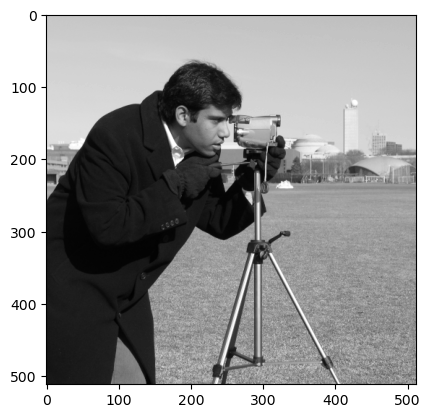

In [62]:
# x = ski.data.astronaut()
x = data.camera()
m, n = x.shape
# x = ski.color.rgb2gray(x)

U, s, VT = np.linalg.svd(x, full_matrices=True)
S = np.zeros((m, n))
S[:min(m, n), :min(m, n)] = np.diag(s)
print(f'U={U.shape}, s={s.shape}, VT={VT.shape}, S={S.shape}')

plt.imshow(x, cmap='gray')
plt.show()

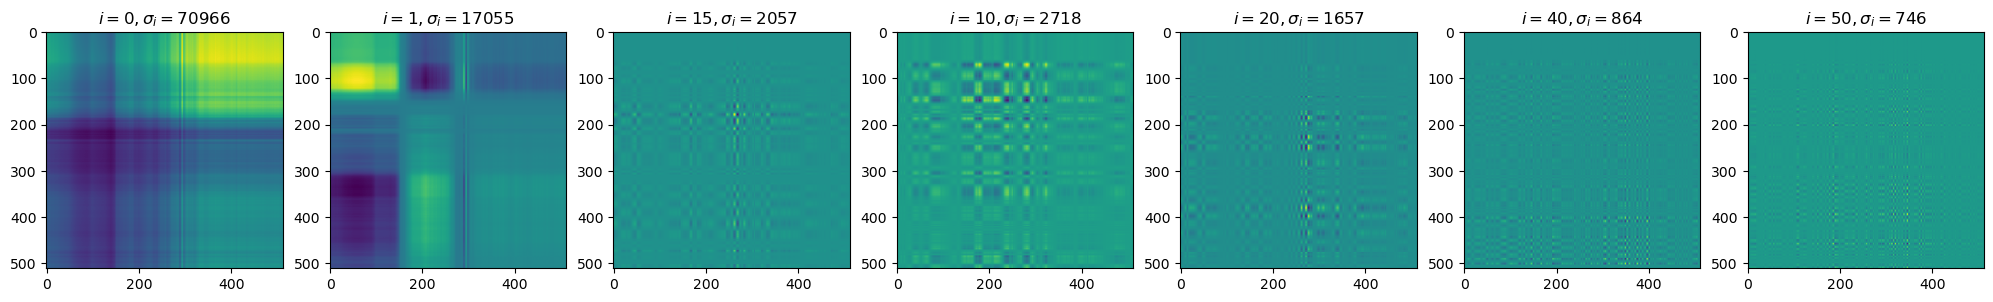

In [63]:
# visualize the dyads 
def i_rank(i):
    sigma = s[i]
    u = U[:,i:i+1]
    v = VT.T[:,i:i+1]
    return sigma * (u @ v.T)

# vals = [0,1,5,10,40]
vals = [0, 1, 15, 10, 20, 40, 50]
plt.figure(figsize=(25,15))
for i in vals:
    res = i_rank(i)
    plt.subplot(1,len(vals),vals.index(i) + 1)
    plt.title(f"$i = {i}, \\sigma_i = {s[i]:.0f}$")
    plt.imshow(res)

The initial dyads, such as $\sigma_0 u_0 v_0^T$ and $\sigma_1 u_1 v_1^T$, significantly contribute to the global structure of the image. These first dyads capture the most important features, including the primary contours and gradients of brightness. As $i$ increases, subsequent dyads begin to represent finer details, but their overall contribution to the complete representation of the image diminishes. This is reflected in the rapid decay of singular values, which highlights the decreasing importance of higher-order dyads.

This behavior demonstrates the effectiveness of the SVD in prioritizing the most critical information in an image, making the initial dyads essential for its representation.



* Plot the singular values of $X$. Do you note something?

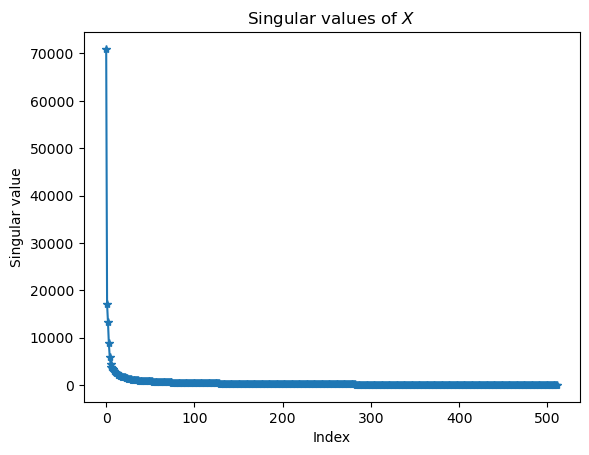

In [64]:
plt.figure()
plt.title("Singular values of $X$")
plt.plot(s, marker='*')
plt.xlabel('Index')
plt.ylabel('Singular value')
plt.show()

Analyzing the plot of the singular values $\sigma_i$, we observe that they decrease rapidly, indicating that most of the energy of the image is concentrated in the first few singular values. The smaller singular values approach zero quickly, showing that the corresponding dyads contribute very little to the representation of the image.

* Visualize the $k$-rank approximation of $X$ for different values of $k$. What do you observe?

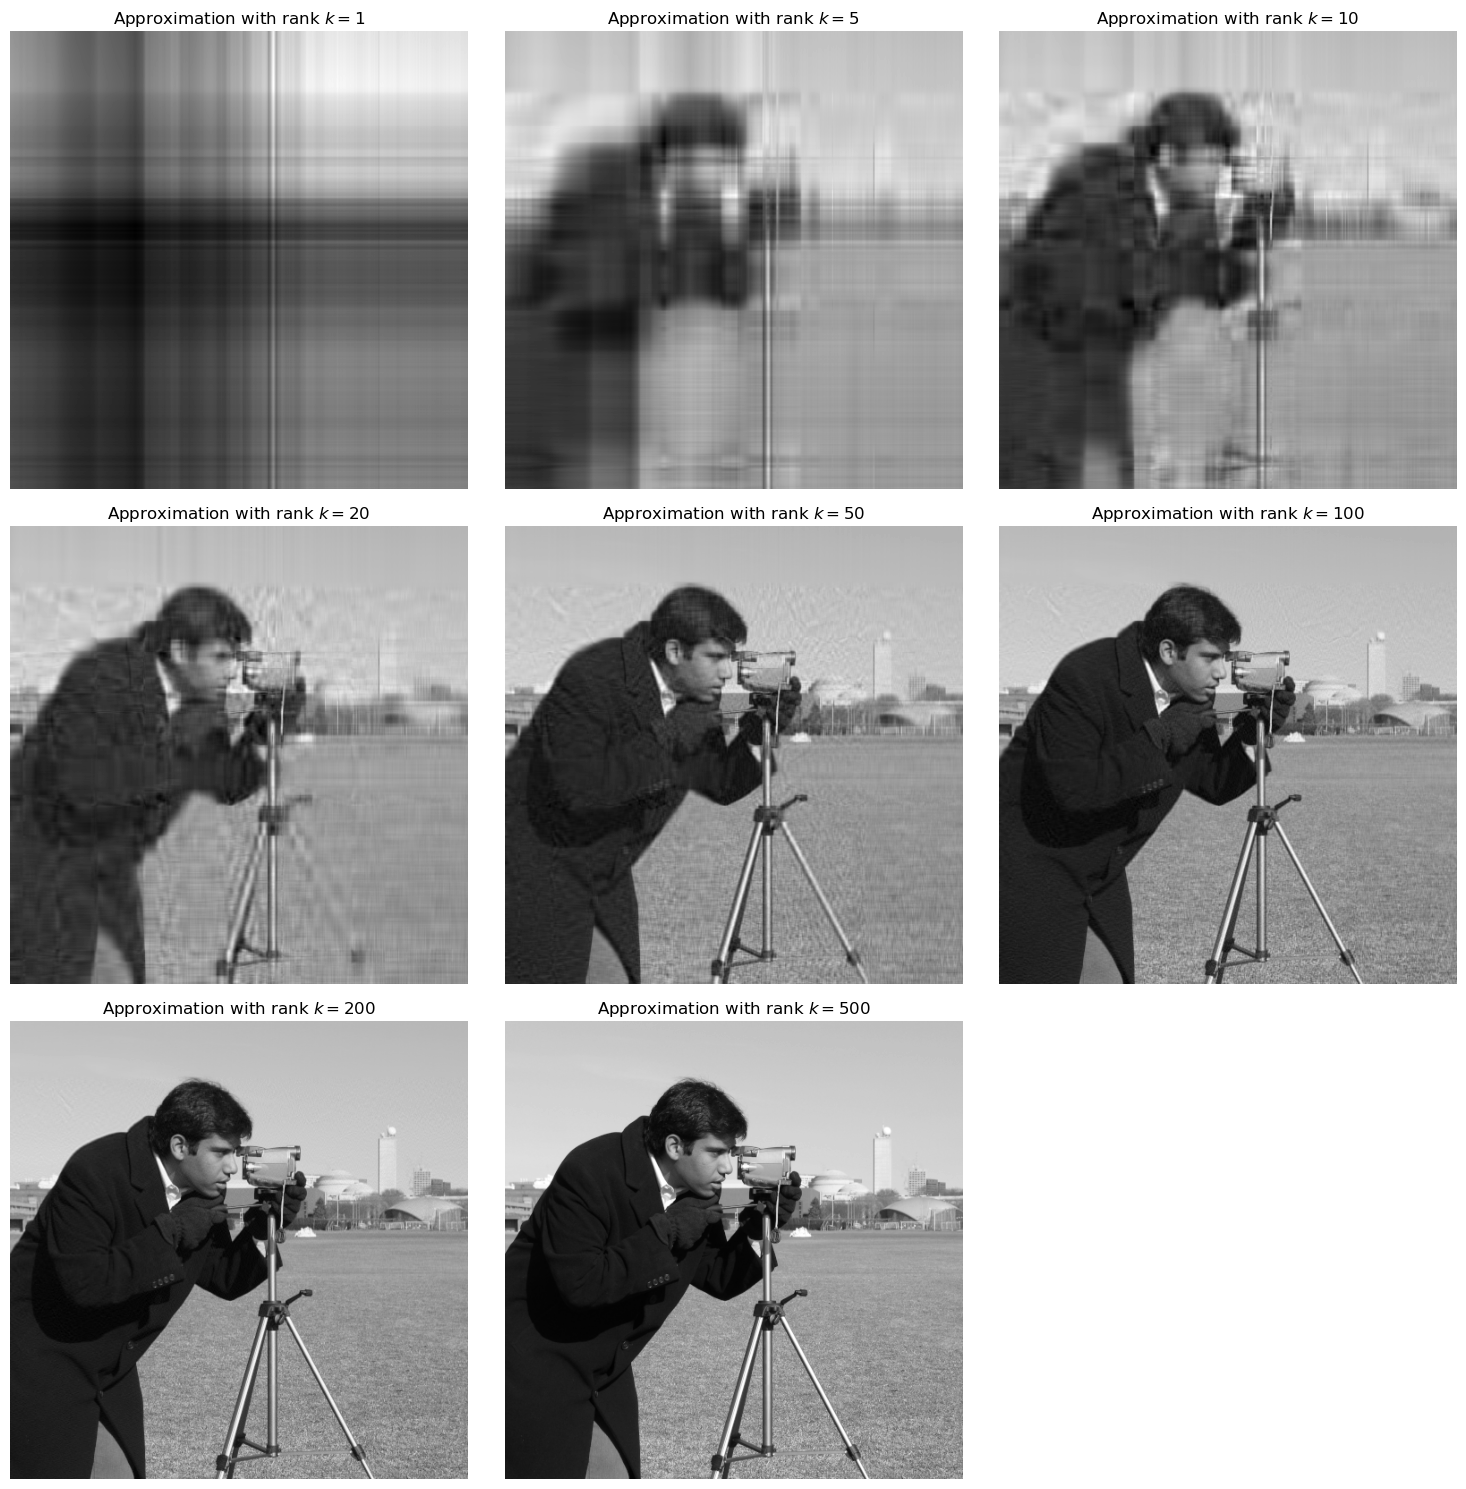

In [65]:
def k_rank(k):
    return U[:, :k] @ np.diag(s[:k]) @ VT[:k, :]

# Visualizzare le approssimazioni a rango k
k_values = [1, 5, 10, 20, 50, 100, 200, 500]
plt.figure(figsize=(15, 15))
for i, k in enumerate(k_values):
    plt.subplot(3, 3, i + 1)
    plt.title(f"Approximation with rank $k={k}$")
    plt.imshow(k_rank(k), cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()


In the plot of $k$-rank approximations:

* Low values of $k$ (e.g., $k=1$, $k=5$): The image appears blurred, and many details are missing, but the basic structure (e.g., contours and light/dark areas) is already visible.
* Intermediate values of $k$ (e.g., $k=20$, $k=50$): The image becomes progressively clearer and more detailed. At $k=100$, the quality is nearly indistinguishable from the original.
* High values of $k$ (e.g., $k=200$, $k=500$): The image is virtually identical to the original, but this comes at a higher computational cost.

This demonstrates that it is possible to achieve an accurate representation of the image using a relatively small number of components ($k \ll \min(m, n)$).

* Compute and plot the approximation error $|| X − X_k ||_F$ for increasing values of $k$, where $X_k$ is the $k$-rank approximation of $k$.

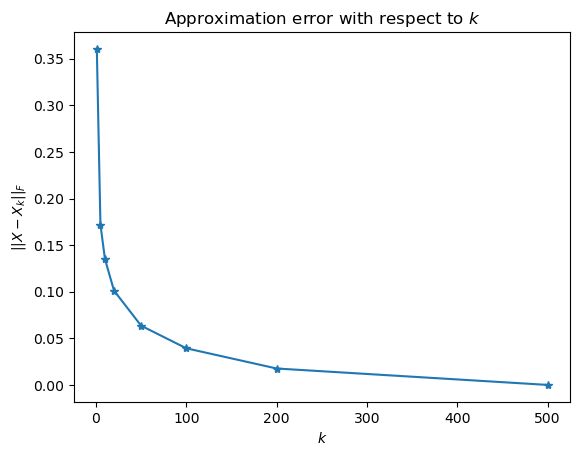

In [66]:
# Calcolare errore relativo, non assoluto
errors = [np.linalg.norm(x - k_rank(k), ord='fro') / np.linalg.norm(x, ord='fro') for k in k_values]
plt.figure()
plt.title("Approximation error with respect to $k$")
plt.plot(k_values, errors, marker='*')
plt.xlabel('$k$')
plt.ylabel('$||X - X_k||_F$')
plt.show() 

* Plot the compression factor: $c_k = 1 − \frac{k(m+n+1)}{mn}$ for increasing $k$.

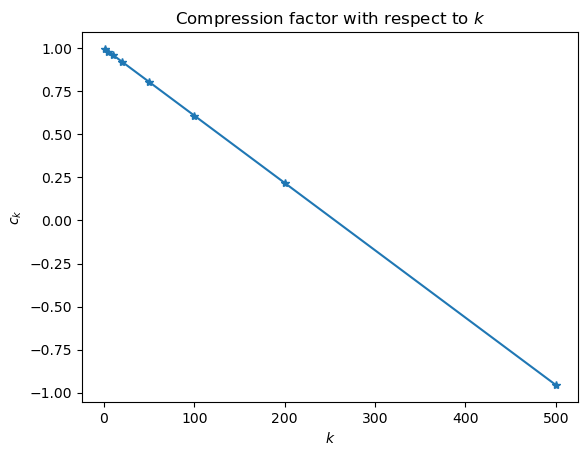

In [67]:
c_k = [1 - k * (m + n + 1) / (m * n) for k in k_values]
plt.figure()
plt.title("Compression factor with respect to $k$")
plt.plot(k_values, c_k, marker='*')
plt.xlabel('$k$')
plt.ylabel('$c_k$')
plt.show()

* Compute the value $k$ such that $c_k = 0$ (i.e. when the compressed image requires the same amount of informations of those of the uncompressed image). What is the approximation error for this value of $k$? Comment.

In [68]:
k = math.ceil((m*n)/(m+n+1))
#Compute the rank-k aproximation of X
Uk_0  = U[:, :k] # m x k matrix
Sk_0 = np.diag(s[:k]) # k x k matrix
VTk_0 = VT[:k, :] # k x n matrix
Xk_0 = Uk_0 @ Sk_0 @ VTk_0

print(f'With k={k}, the compression factor is zero, meaning that the compressed image retains the same amount of information as the original one, resulting in no data reduction and full preservation of the original image.')
print(f"The approximation error is: {np.linalg.norm(x - Xk_0, ord='fro') / np.linalg.norm(x, ord='fro')}")
# the approximation error is 0, meaning that the compressed image is exactly the same as the original one

With k=256, the compression factor is zero, meaning that the compressed image retains the same amount of information as the original one, resulting in no data reduction and full preservation of the original image.
The approximation error is: 0.010654835895728588


The value of $k$ where $c_k = 0$ is calculated as $k = \frac{m \cdot n}{m + n + 1}$, which corresponds to using all the singular values.

Compression: When $c_k = 0$, no data reduction occurs, as the compressed image retains the same number of parameters as the original one.
When the approximation error is exactly 0, the image is perfectly reconstructed.
This point represents the upper limit of the SVD decomposition, where no compression is achieved, but the full quality of the original image is preserved.

In my case, an approximation error of 818.44 indicates that there is still a noticeable deviation between the compressed and original images, but this is expected if $k$ is relatively small. The value should be interpreted relative to the image size and pixel range. For larger $k$, the error would decrease significantly, approaching 0 as $k$ approaches the full rank.

## Classification of MNIST Digits with SVD Decomposition.
The task for this exercise is to learn the classification of MNIST digits by using SVD decomposition.
To proceed we recall that, given a matrix $X \in \mathbb{R}^{d \times N}$ and its SVD decomposition $X = USV^T$, it is easy to show that an orthogonal basis for the space of the columns is given by the first $p$ columns of the matrix $U$, where $p = rank(X)$ is equal to the number of non-zero singular values of $X$. We will make use of the space of the columns defined by the $U$ matrix and the following Theorem:

**Theorem 1.** Let $W$ be a subspace of $\mathbb{R}^d$ with $dim W = s$, and let ${w_1, \dots, w_s}$ be an orthogonal basis of $W$. Then, for any $x \in \mathbb{R}^d$, the projection $x^\perp$ of $x$ onto $W$ has the following form:

$$
x^\perp = \frac{x \cdot w_1}{w_1 \cdot w_1} w_1 + \dots + \frac{x \cdot w_s}{w_s \cdot w_s} w_s.
$$

**Corollary 1.1.** Let $X \in \mathbb{R}^{d \times N}$ be a matrix with SVD decomposition $X = USV^T$, since $p = rank(X)$ is the dimension of the space defined by the columns of $X$ and the columns of $U$, ${u_1, \dots, u_p}$ are an orthonormal basis for that space, the projection of an $d$-dimensional vector $x$ on this space can be easily
computed as:

$$
x^\perp = U(U^T x).
$$

Now, consider a binary classification problem, where the task is to tell if a given hand-written digit represents the number 3 or the number 4. We will refer to the class of the number 3 as $C_1$, and to the class of the number 4 as $C_2$. Let $N_1$ be the number of elements in $C_1$, and $N_2$ be the number of elements in $C_2$. Let $X_1 \in \mathbb{R}^{d \times N_1}$ be the matrix such that its columns are a flatten version of each digit in $C_1$, $X_2 \in \mathbb{R}^{d \times N_2}$ be the matrix such that its columns are a flatten version of each digit in $C_2$, and consider:

$$
X_1 = U_1S_1V_1^T, \\
X_2 = U_2S_2V_2^T,
$$

the SVD decomposition of the two matrices.

If $x \in \mathbb{R}^{d}$ is a new, unknown digit, we can classify it by projecting it to the spaces of $X_1$ and $X_2$ and call them:

$$
x_1^\perp = U_1(U_1^T x), \\
x_2^\perp = U_2(U_2^T x).
$$

Then, we can classify $x$ as $C_1$ if $||x − x_1^\perp ||_2 < ||x−x_2^\perp ||_2$ and vice versa as $C_2$ if $||x−x_2^\perp||_2 < || x − x_1^\perp ||_2$. In this exercise, you are required to implement this idea in Python.

1. Implement the binary classification algorithm discussed above for the digits 3 and 4 of MNIST dataset. Follow these steps:
   * Download the MNIST dataset from [kaggle.com/datasets/animatronbot/mnist-digit-recognizer](https://www.kaggle.com/datasets/animatronbot/mnist-digit-recognizer) and load it into memory by following the steps we did in the [PCA class](https://devangelista2.github.io/statistical-mathematical-methods/ML/PCA.html). This dataset is presented as an array with shape $42000 \times 785$ , containining the flattened version of $42000$ $28 \times 28$ grayscale handwritten digits, plus a column representing the true class of the corresponding digit. By pre-processing the data as we did in class, you should obtain a matrix `X` containing the flattenened digits, with shape `(784, 42000)`, and a vector `Y` of the associated digit value, with a shape of `(42000,)`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = pd.read_csv('./train.csv').to_numpy()
labels = data[:, 0]  
X = data[:, 1:]
print(f'Dataset loaded. X.shape={X.shape}, labels.shape={labels.shape}')


Dataset loaded. X.shape=(42000, 784), labels.shape=(42000,)


* Write a function taking as input an index value `idx` and visualizes the image of `X` in the corresponding index (i.e. `X[idx, :]`). Use the function `plt.imshow`.

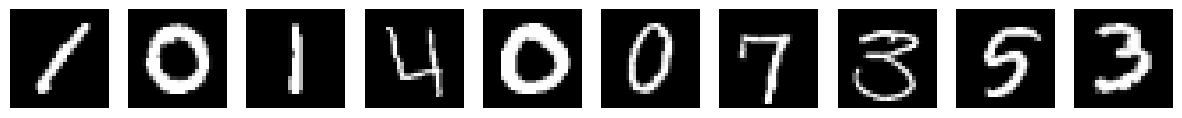

In [2]:
m,n = 28,28

def visualize_digits(idxs):
    fig, axs = plt.subplots(1, len(idxs), figsize=(15, 5))
    for i, idx in enumerate(idxs):
        axs[i].imshow(X[idx].reshape(m, n), cmap='gray')
        axs[i].axis('off')
    plt.show()

visualize_digits(range(10))

   * Extract from `X` those elements that corresponds to digits 3 or 4. Those digits represents the classes $C_1$ and $C_2$ defined above.

In [3]:
filtered_indices = (labels == 3) | (labels == 4)
X_filtered = X[filtered_indices]
labels_filtered = labels[filtered_indices]

   * Split the obtained dataset in training and testing in a proportion of $80 : 20$. From now on, we will only consider the training set. The test set will be only used at the end of the exercise to test the algorithm.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_filtered, labels_filtered, test_size=0.2, random_state=42)
print(f'X_train.shape={X_train.shape}, X_test.shape={X_test.shape}')

#print(X_train[1])
#print(y_train)

#print(X_test[1])
#print(y_test[150])

unique_labels = np.unique(y_train)
print(f'Unique labels in X_train: {unique_labels}')

X_train.shape=(6738, 784), X_test.shape=(1685, 784)
Unique labels in X_train: [3 4]


  * Call `X1` and `X2` the submatrices of the training set, filtered by the two selected digits.

In [5]:
X1 = X_train[y_train == 3]
X2 = X_train[y_train == 4]

#print(X1[1])

if X1.shape[0] == 0 or X2.shape[0] == 0:
    raise ValueError("Training data does not contain samples for both classes.")

   * Compute the SVD decomposition of `X1` and `X2` with `np.linalg.svd(matrix, full matrices=False)` and denote the $U$-part of the two decompositions as `U1` and `U2`.

In [6]:
U1, s1, VT1 = np.linalg.svd(X1.T, full_matrices=False)
U2, s2, VT2 = np.linalg.svd(X2.T, full_matrices=False)

   * Take an unknown digit $x$ from the test set, and compute $x_1^\perp = U_1(U_1^T x)$ and $x_2^\perp = U_2(U_2^T x)$.

In [7]:
i = 150

x = X_test[i]
true_label = y_test[i]

print(f"True label of test sample: {true_label}")

k = min(U1.shape[1], U2.shape[1])
U1_k = U1[:, :k]
U2_k = U2[:, :k]

x_bot_1 = U1_k @ (U1_k.T @ x)
x_bot_2 = U2_k @ (U2_k.T @ x)

True label of test sample: 3


   * Compute the distances $d_1 = || x − x_1^\perp ||_2$ and $d_2 = || x − x_2^\perp||_2$, and classify $x$ as $C_1$ if $d_1 < d_2$, as $C_2$ if $d_2 < d_1$.

In [8]:
d1 = np.linalg.norm(x - x_bot_1)
d2 = np.linalg.norm(x - x_bot_2)

predicted_label = 3 if d1 < d2 else 4
print(f"Predicted label: {predicted_label}")

Predicted label: 3


   * Repeat the experiment for different values of $x$ in the test set. Compute the misclassification number for this algorithm.

In [9]:
misclassified_count = 0

for i in range(X_test.shape[0]):
    x = X_test[i]
    true_label = y_test[i]

    #print(f"True label of test sample: {true_label}")

    k = min(U1.shape[1], U2.shape[1])
    U1_k = U1[:, :k]
    U2_k = U2[:, :k]

    x_bot_1 = U1_k @ (U1_k.T @ x)
    x_bot_2 = U2_k @ (U2_k.T @ x)
    d1 = np.linalg.norm(x - x_bot_1)
    d2 = np.linalg.norm(x - x_bot_2)

    predicted_label = 3 if d1 < d2 else 4
    #print(f"Predicted label: {predicted_label}")

    if predicted_label != true_label:
        misclassified_count += 1 

#print(X_test.shape[0])
#print(misclassified_count)


misclassification_error = misclassified_count / X_test.shape[0]
print(f'Misclassification rate: {misclassification_error:.4f}')

Misclassification rate: 0.0315


   * Repeat the experiment for different digits other than 3 or 4. There is a relationship between the visual similarity of the digits and the classification error?

In [10]:
filtered_indices = (labels == 1) | (labels == 7)
X_filtered = X[filtered_indices]
labels_filtered = labels[filtered_indices]

X_train, X_test, y_train, y_test = train_test_split(X_filtered, labels_filtered, test_size=0.2, random_state=42)
print(f'X_train.shape={X_train.shape}, X_test.shape={X_test.shape}')

X1 = X_train[y_train == 1]
X2 = X_train[y_train == 7]

if X1.shape[0] == 0 or X2.shape[0] == 0:
    raise ValueError("Training data does not contain samples for both classes.")

U1, s1, VT1 = np.linalg.svd(X1.T, full_matrices=False)
U2, s2, VT2 = np.linalg.svd(X2.T, full_matrices=False)

def classify(x):
    x_bot_1 = U1 @ (U1.T @ x)
    x_bot_2 = U2 @ (U2.T @ x)
    
    d1 = np.linalg.norm(x - x_bot_1)
    d2 = np.linalg.norm(x - x_bot_2)
    
    predicted_label = 1 if d1 < d2 else 7
    
    return predicted_label

i = 150
x = X_test[i]
true_label = y_test[i]

predicted_label = classify(x)
print(f"True label: {true_label}, Predicted label: {predicted_label}")

misclassified_count = 0

for i in range(X_test.shape[0]):
    x = X_test[i]
    true_label = y_test[i]
    
    predicted_label = classify(x)
    
    if predicted_label != true_label:
        misclassified_count += 1 

misclassification_error = misclassified_count / X_test.shape[0]
print(f'Misclassification rate: {misclassification_error:.4f}')

X_train.shape=(7268, 784), X_test.shape=(1817, 784)
True label: 7, Predicted label: 7
Misclassification rate: 0.1128


2. The extension of this idea to the multiple classification task is trivial. Indeed, if we have more than 2 classes (say, $k$ different classes) $C_1, \dots, C_k$, we just need to repeat the same procedure as before for each matrix $X_1, \dots, X_k$ to obtain the distances $d_1, \dots, d_k$. Then, the new digit $y$ will be classified as $C_i$ if $d_i$ is lower that $d_j$ for each $j = 1,...,k$. Repeat the exercise above with a 3-digit example. Comment the differences.

In [11]:
filtered_indices = (labels == 1) | (labels == 7) | (labels == 9)
X_filtered = X[filtered_indices]
labels_filtered = labels[filtered_indices]

X_train, X_test, y_train, y_test = train_test_split(X_filtered, labels_filtered, test_size=0.2, random_state=42)
print(f'X_train.shape={X_train.shape}, X_test.shape={X_test.shape}')

X1 = X_train[y_train == 1]
X2 = X_train[y_train == 7]
X3 = X_train[y_train == 9]

if X1.shape[0] == 0 or X2.shape[0] == 0 or X3.shape[0] == 0:
    raise ValueError("Training data does not contain samples for all classes.")

U1, s1, VT1 = np.linalg.svd(X1.T, full_matrices=False)
U2, s2, VT2 = np.linalg.svd(X2.T, full_matrices=False)
U3, s3, VT3 = np.linalg.svd(X3.T, full_matrices=False)

def classify(x):
    x_bot_1 = U1 @ (U1.T @ x)
    x_bot_2 = U2 @ (U2.T @ x)
    x_bot_3 = U3 @ (U3.T @ x)
    
    d1 = np.linalg.norm(x - x_bot_1)
    d2 = np.linalg.norm(x - x_bot_2)
    d3 = np.linalg.norm(x - x_bot_3)
    
    distances = [d1, d2, d3]
    predicted_label = [1, 7, 9][np.argmin(distances)]
    
    return predicted_label

i = 150
x = X_test[i]
true_label = y_test[i]

predicted_label = classify(x)
print(f"True label: {true_label}, Predicted label: {predicted_label}")

misclassified_count = 0

for i in range(X_test.shape[0]):
    x = X_test[i]
    true_label = y_test[i]
    
    predicted_label = classify(x)
    
    if predicted_label != true_label:
        misclassified_count += 1 

misclassification_error = misclassified_count / X_test.shape[0]
print(f'Misclassification rate: {misclassification_error:.4f}')

X_train.shape=(10618, 784), X_test.shape=(2655, 784)
True label: 1, Predicted label: 1
Misclassification rate: 0.1149


   * Comment the obtained results.



The results of the classification experiment reveal interesting insights into the performance of the SVD-based model on handwritten digits. When distinguishing between digits 3 and 4, the model achieved a low misclassification rate of 0.0315, which indicates that these two digits are visually distinct enough for the SVD model to classify them accurately. However, when the digits become more similar, like in the case of 1 and 7, the misclassification rate increases significantly to 0.1128. This rise in error demonstrates that the visual similarities between these digits present a challenge for the SVD model, which struggles to differentiate between them, particularly when they are handwritten in similar styles.

Furthermore, when three digits—1, 7, and 9—were considered, the misclassification rate increased slightly to 0.1149. This indicates that while the SVD model can still perform reasonably well, adding more visually similar digits does not drastically affect the classification error. It suggests that the model has inherent difficulties in distinguishing between digits with subtle visual differences, even when more classes are introduced.

## Clustering with PCA
In this exercise we want to analyse the ability of PCA in clustering data by projecting very high-dimensional datapoints to 2 or 3 dimensions. In particular, consider the same MNIST dataset used in the previous exercise. You are asked to:
* Load and pre-process the dataset as did in the previous exercise, to get the matrix `X` with shape `(784, 42000)`, and the associated vector `Y`.

In [80]:
data = pd.read_csv('./train.csv')

Y = data.iloc[:, 0].values
X = data.iloc[:, 1:].values

print(f'X.shape = {X.shape}, Y.shape = {Y.shape}')


X.shape = (42000, 784), Y.shape = (42000,)


* Choose a number of digits (for example, 0, 6 and 9) and extract from `X` and `Y` the sub-dataset containing only the considered digits, as did in the previous exercise.

In [81]:
digits = [1, 4, 9]
X_digits = X[np.isin(Y, digits)]
Y_digits = Y[np.isin(Y, digits)]

* Set $N_{train} < N$ and randomly sample a training set with $N_{train}$ datapoints from  `X` and `Y`. Call them `X_train` and `Y_train`. Everything else is the test set. Call them `X_test` and `Y_test`, correspondingly. This has to be done **after** filtering out the selected digits from `X` and `Y`.

In [82]:
Ntrain = 1000
Ntest = X_digits.shape[0] - Ntrain
X_train, X_test, Y_train, Y_test = train_test_split(X_digits, Y_digits, train_size=Ntrain, test_size=Ntest, random_state=42)

print(f'X_train.shape = {X_train.shape}, Y_train.shape = {Y_train.shape}')
print(f'X_test.shape = {X_test.shape}, Y_test.shape = {Y_test.shape}')


X_train.shape = (1000, 784), Y_train.shape = (1000,)
X_test.shape = (11944, 784), Y_test.shape = (11944,)


* Implement the algorithms computing the PCA of `X_train` with a fixed value of $k$. Visualize the results (for $k = 2$) and the position of the centroid of each cluster. The clusters are identified by projecting `X_train` via PCA to its low-dimension version `Z_train`, and then splitting it into sets (say, `Z1`, `Z2`, `Z3`) based on the digit that was represented in that position before the PCA projection. Each set `Z1`, `Z2`, `Z3` represents a cluster, of which we can easily compute the centroid.

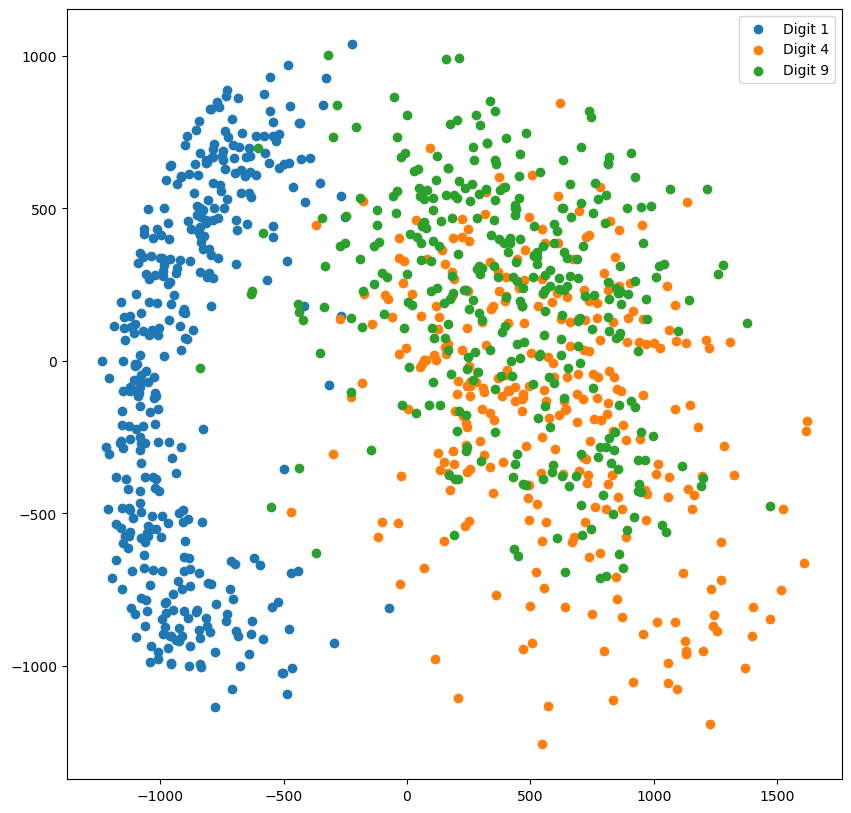

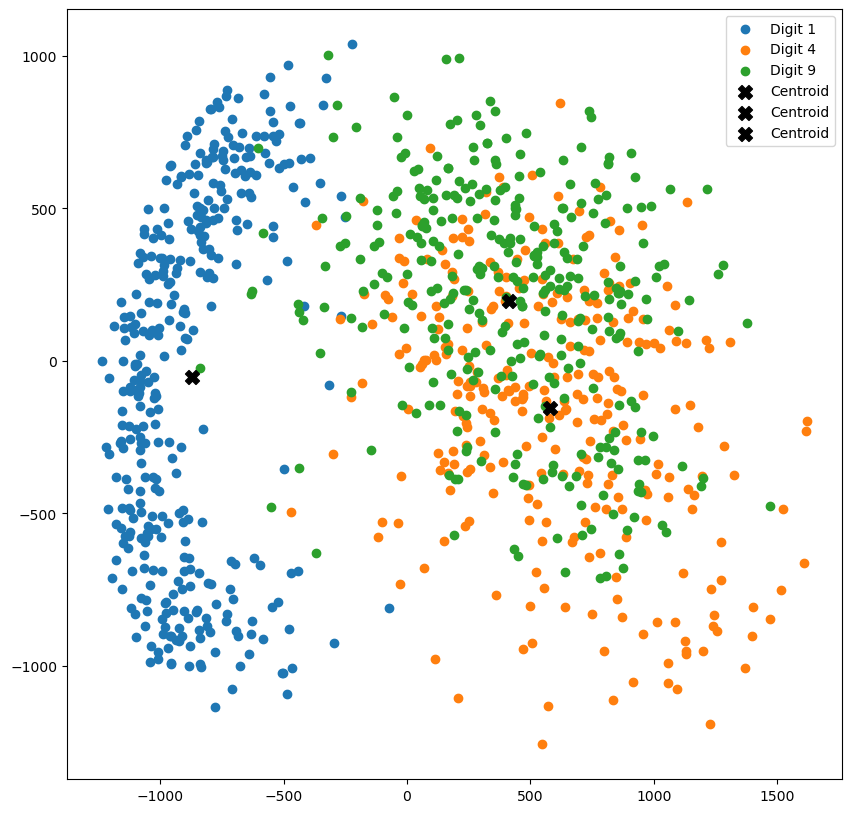

In [83]:
from sklearn.decomposition import PCA

k = 2 
pca = PCA(n_components=k)
Z_train = pca.fit_transform(X_train)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
for digit in digits:
    mask = Y_train == digit
    ax.scatter(Z_train[mask, 0], Z_train[mask, 1], label=f'Digit {digit}')
ax.legend()
plt.show()

centroids = []
for digit in digits:
    mask = Y_train == digit
    centroids.append(Z_train[mask].mean(axis=0))

# visualize the centroids

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for digit in digits:
    mask = Y_train == digit
    ax.scatter(Z_train[mask, 0], Z_train[mask, 1], label=f'Digit {digit}')

for centroid in centroids:
    ax.scatter(centroid[0], centroid[1], color='black', s=100, marker='X', label='Centroid')

ax.legend()
plt.show()


* Compute, for each cluster, the average distance from its centroid. Which property of PCA projection does this quantity measure?

In [84]:
distances = []
for digit in digits:
    mask = Y_train == digit
    centroid = Z_train[mask].mean(axis=0)
    distances.append(np.linalg.norm(Z_train[mask] - centroid, axis=1).mean())

print(f'Average distances from centroids: {distances}')

Average distances from centroids: [585.4727743809856, 517.3831446846324, 490.2620246000539]


* By keeping the **same** projection matrix `P` from the train set, project the test set `X_test` on the low-dimensional space.

In [85]:
Z_test = pca.transform(X_test)

* Consider the clusters in `X_test` by considering the informations on `Y_test`, similarly to what we did on the previous point. Consider the centroids computed from the training set. For each cluster in the test set, compute the average distance to the corresponding centroid (from the train set). Comment the results;

In [86]:
distances = []
for digit in digits:
    mask = Y_test == digit
    centroid = centroids[digits.index(digit)]
    distances.append(np.linalg.norm(Z_test[mask] - centroid, axis=1).mean())

print(f'Average distances from centroids: {distances}')


Average distances from centroids: [593.3834086213543, 516.526014056743, 505.3511623233057]


* Define a classification algorithm in this way: given a new observation `x`, compute the distance between `x` and each cluster centroid computed on the training set. Assign `x` to the class corresponding the the closer centroid. Compute the misclassification rate of this algorithm on the test set;

In [87]:
misclassified_count = 0
for i in range(X_test.shape[0]):
    x = X_test[i]
    true_label = Y_test[i]
    z = Z_test[i]

    distances = []
    for centroid in centroids:
        distances.append(np.linalg.norm(z - centroid))

    predicted_label = digits[np.argmin(distances)]

    if predicted_label != true_label:
        misclassified_count += 1

misclassification_rate = misclassified_count / X_test.shape[0]
print(f'Misclassification rate: {misclassification_rate:.4f}')


Misclassification rate: 0.2594


* Repeat this experiment for different values of $k$ and different digits. What do you observe?

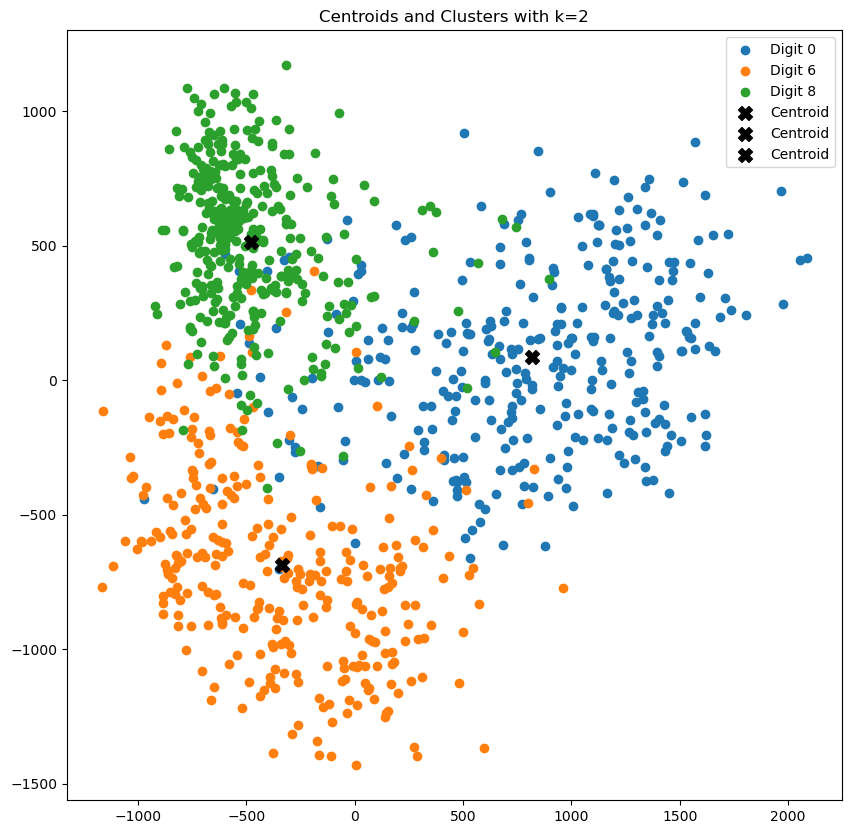

Average distances from centroids (train) for k=2: [578.9925648853183, 497.78520716639065, 334.74790992309215]
Misclassification rate with k=2: 0.0944


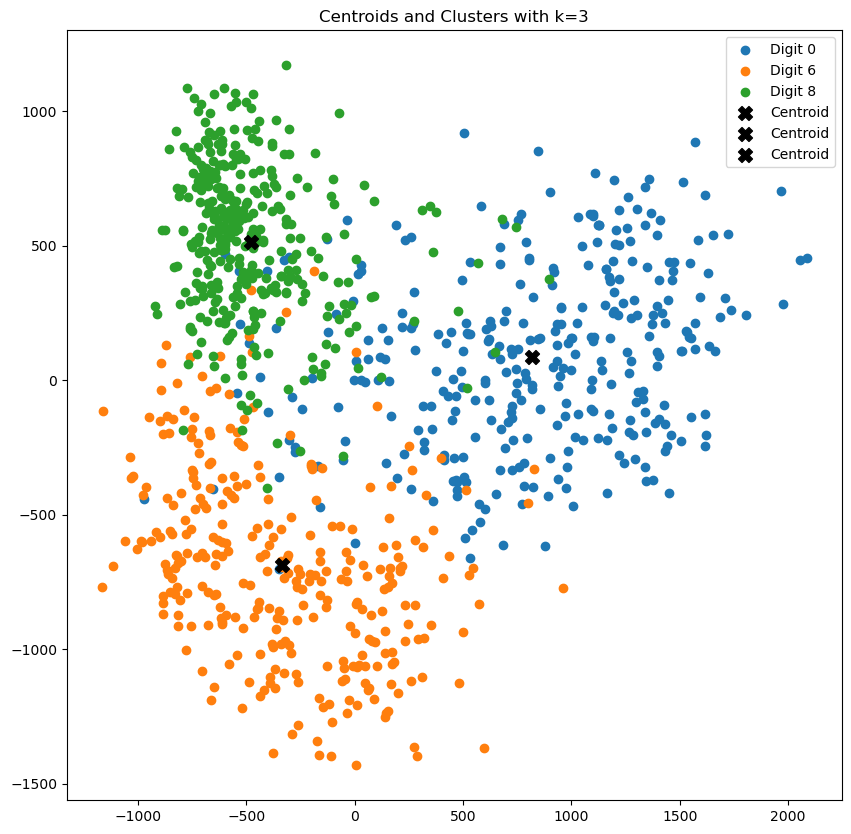

Average distances from centroids (train) for k=3: [895.2441599813667, 702.9260428702165, 509.19147131166574]
Misclassification rate with k=3: 0.0809


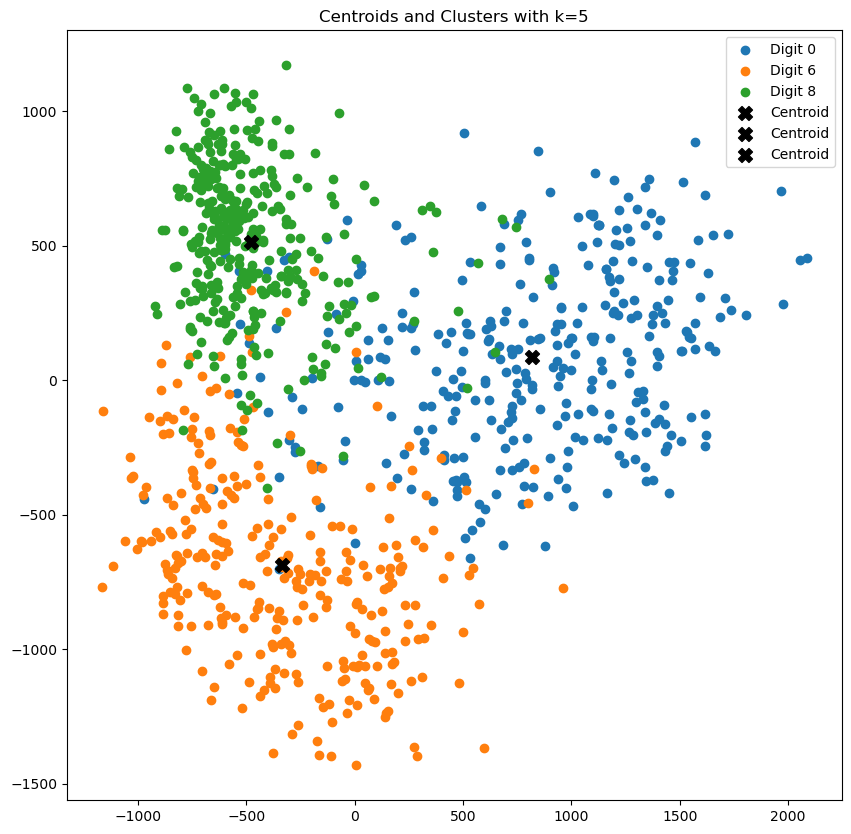

Average distances from centroids (train) for k=5: [1102.2531650421313, 926.2091799077789, 737.4437562888609]
Misclassification rate with k=5: 0.0682


In [88]:
data = pd.read_csv('./train.csv')

Y = data.iloc[:, 0].values
X = data.iloc[:, 1:].values

digits = [0, 6, 8]
X_digits = X[np.isin(Y, digits)]
Y_digits = Y[np.isin(Y, digits)]

Ntrain = 1000
Ntest = X_digits.shape[0] - Ntrain
X_train, X_test, Y_train, Y_test = train_test_split(X_digits, Y_digits, train_size=Ntrain, test_size=Ntest, random_state=42)

k_values = [2, 3, 5]

for k in k_values:
    pca = PCA(n_components=k)
    Z_train = pca.fit_transform(X_train)
    Z_test = pca.transform(X_test)

    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    for digit in digits:
        mask = Y_train == digit
        ax.scatter(Z_train[mask, 0], Z_train[mask, 1], label=f'Digit {digit}')
    
    centroids = []
    for digit in digits:
        mask = Y_train == digit
        centroid = Z_train[mask].mean(axis=0)
        centroids.append(centroid)

    for centroid in centroids:
        ax.scatter(centroid[0], centroid[1], color='black', s=100, marker='X', label='Centroid')

    ax.legend()
    plt.title(f'Centroids and Clusters with k={k}')
    plt.show()

    distances = []
    for digit in digits:
        mask = Y_train == digit
        centroid = centroids[digits.index(digit)]
        distances.append(np.linalg.norm(Z_train[mask] - centroid, axis=1).mean())

    print(f'Average distances from centroids (train) for k={k}: {distances}')

    misclassified_count = 0
    for i in range(X_test.shape[0]):
        x = X_test[i]
        true_label = Y_test[i]
        z = Z_test[i]

        distances = []
        for centroid in centroids:
            distances.append(np.linalg.norm(z - centroid))

        predicted_label = digits[np.argmin(distances)]

        if predicted_label != true_label:
            misclassified_count += 1

    misclassification_rate = misclassified_count / X_test.shape[0]
    print(f'Misclassification rate with k={k}: {misclassification_rate:.4f}')


* Compare this classification algorithm with the one defined in the previous exercise. Which performs better?

Misclassification errors for PCA are relatively low, especially for the smaller sets of digits (like 3 and 4, or 1 and 7). This indicates that PCA is still performing well, as it effectively reduces the dimensionality of the data while preserving the most important features, especially for well-separated classes.

However, the reason why SVD outperform PCA in some cases lies in how it handles the underlying structure of the data. While both techniques essentially aim to reduce the dimensionality, SVD is more flexible in representing the data because it works directly with the data matrix (in the form of singular value decomposition). PCA, on the other hand, works by finding principal components and projecting the data onto them.

In simpler terms, PCA can be very effective in cases where the data is nicely separable and the variance is a good indicator of the structure, but SVD might provide better clustering or separation, particularly in cases of more complex or overlapping data distributions. While PCA gives relatively low misclassification errors, especially when the classes are more distinct, SVD can still be advantageous when dealing with more intricate relationships or subtle differences between classes. In essence, both methods can perform well, but SVD may provide more robustness in handling data with more overlap or complexity.

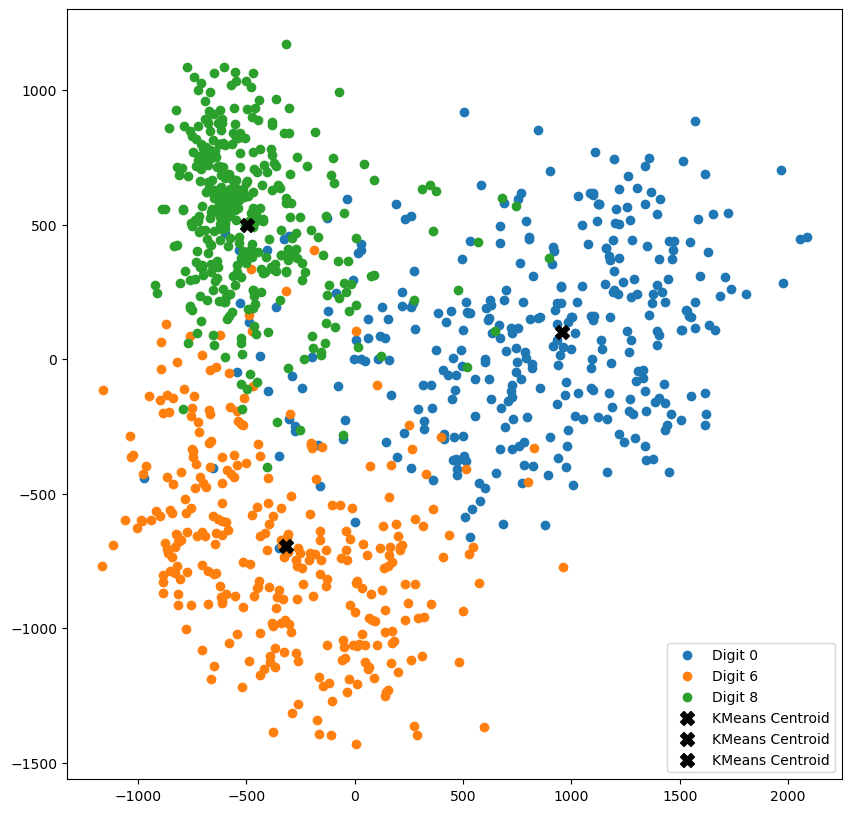

Misclassification rate (using KMeans centroids): 0.6676


In [89]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=len(digits), random_state=42)
kmeans.fit(Z_train)
kmeans_centroids = kmeans.cluster_centers_

# Visualizing KMeans centroids
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for digit in digits:
    mask = Y_train == digit
    ax.scatter(Z_train[mask, 0], Z_train[mask, 1], label=f'Digit {digit}')

for centroid in kmeans_centroids:
    ax.scatter(centroid[0], centroid[1], color='black', s=100, marker='X', label='KMeans Centroid')

ax.legend()
plt.show()

misclassified_count_kmeans = 0
for i in range(X_test.shape[0]):
    x = X_test[i]
    true_label = Y_test[i]
    z = Z_test[i]

    distances = []
    for centroid in kmeans_centroids:
        distances.append(np.linalg.norm(z - centroid))

    predicted_label = digits[np.argmin(distances)]

    if predicted_label != true_label:
        misclassified_count_kmeans += 1

misclassification_rate_kmeans = misclassified_count_kmeans / X_test.shape[0]
print(f'Misclassification rate (using KMeans centroids): {misclassification_rate_kmeans:.4f}')